## Proyecto final
## COA-501 Herramientas de cómputo para investigadores (R y Python)
## Alumno: Ivan Fermin Quiroz Ibañez

In [1]:
getwd()

[1] "/home/jovyan"

In [7]:
#cargar base de datos
base <- read.csv("/home/jovyan/ABCPE_MIXTO_B1_R_coordenadas.csv")
base$Arbol <- as.factor(base$Arbol)
base$Bloque <- as.factor(base$Bloque)
base$Anio <- as.factor(base$Anio)
base$Muestreo <- as.factor((base$Muestreo))
base$Fungicida<- as.factor((base$Fungicida))
base$Nutrimento <- as.factor((base$Nutrimento))
base$DDA <- as.factor((base$DDA))
base$trat <- as.factor((base$trat))
base$AltRan <- as.factor((base$AltRan))

### **0) Estudio de caso**
Se cuenta con la base de datos de un experimento realizado en Puebla, dónde se evaluaron los efectos de fertilizantes y plaguicidas contra una enfermedad foliar
conocida como tizón suizo en árboles de navidad de la especie Douglas-fir. Se tomaron
variables como transparencia de copa, severidad, incidencia, longitud de brotes, área de áciculas, etc. El objetivo del análisis es determinar la mejor técnica de machine learnign o aprendizaje automático (Naive Bayes, K-NN y Random Forest) para clasificar la transparencia de copa en Douglas-fir.

### **1) Base de datos y AED**

     Arbol       Bloque       Longitud         Latitud          X_UTM       
 1      : 12   Alta :216   Min.   :-97.99   Min.   :19.72   Min.   :605708  
 2      : 12   Baja :216   1st Qu.:-97.99   1st Qu.:19.72   1st Qu.:605724  
 3      : 12   Media:216   Median :-97.99   Median :19.72   Median :605732  
 4      : 12               Mean   :-97.99   Mean   :19.72   Mean   :605732  
 5      : 12               3rd Qu.:-97.99   3rd Qu.:19.72   3rd Qu.:605741  
 6      : 12               Max.   :-97.99   Max.   :19.72   Max.   :605759  
 (Other):576                                                                
     Y_UTM            Altitud      AltRan    Fungicida Nutrimento      Rep     
 Min.   :2180985   Min.   :2973   Alta:312   1:216     1:216      Min.   :1.0  
 1st Qu.:2181009   1st Qu.:2979   Baja:336   2:216     2:216      1st Qu.:1.0  
 Median :2181025   Median :2982              3:216     3:216      Median :1.5  
 Mean   :2181027   Mean   :2985                                 

[1] "data.frame"

'data.frame':	648 obs. of  32 variables:
 $ Arbol     : Factor w/ 54 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Bloque    : Factor w/ 3 levels "Alta","Baja",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Longitud  : num  -98 -98 -98 -98 -98 ...
 $ Latitud   : num  19.7 19.7 19.7 19.7 19.7 ...
 $ X_UTM     : num  605748 605744 605740 605754 605742 ...
 $ Y_UTM     : num  2181070 2181057 2181039 2181034 2181026 ...
 $ Altitud   : num  2979 2979 2980 2980 2984 ...
 $ AltRan    : Factor w/ 2 levels "Alta","Baja": 2 2 2 2 2 1 1 1 1 1 ...
 $ Fungicida : Factor w/ 3 levels "1","2","3": 1 1 2 1 2 1 1 2 2 3 ...
 $ Nutrimento: Factor w/ 3 levels "1","2","3": 1 2 2 2 1 3 3 3 2 1 ...
 $ Rep       : int  1 1 1 2 1 1 2 1 2 1 ...
 $ Muestreo  : Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ DDA       : Factor w/ 6 levels "0","63","91",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Anio      : Factor w/ 2 levels "2016","2017": 1 1 1 1 1 1 1 1 1 1 ...
 $ AcicR     : int  74 129 69 33 98 71 68 44 92 92 .

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 24 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 24 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 24 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 24 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 24 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 24 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 24 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 24 

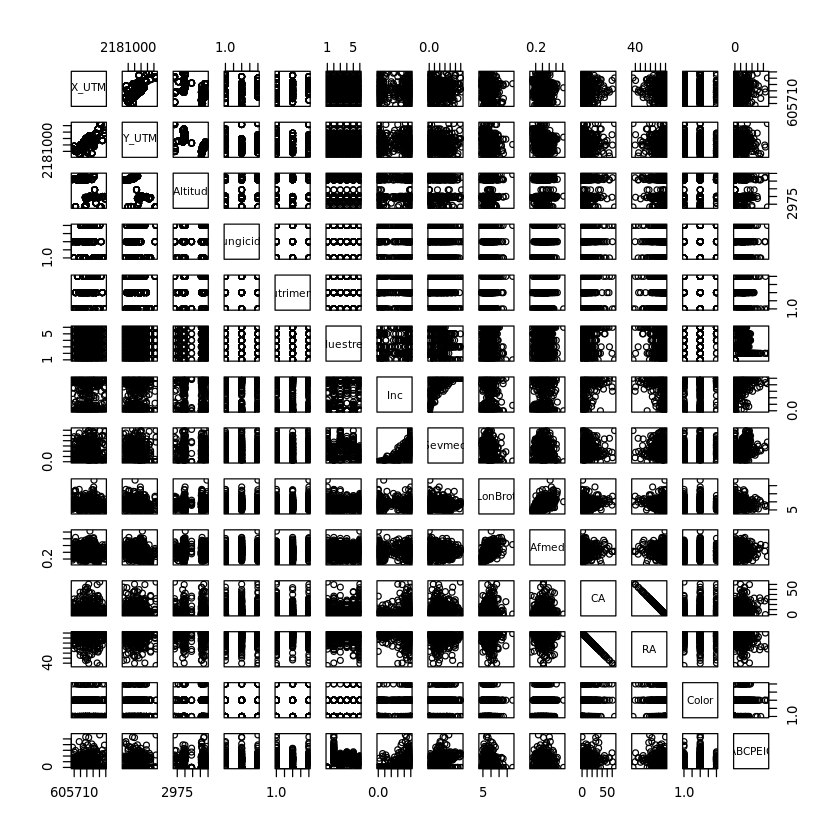

ERROR: Error in library(psych): there is no package called ‘psych’


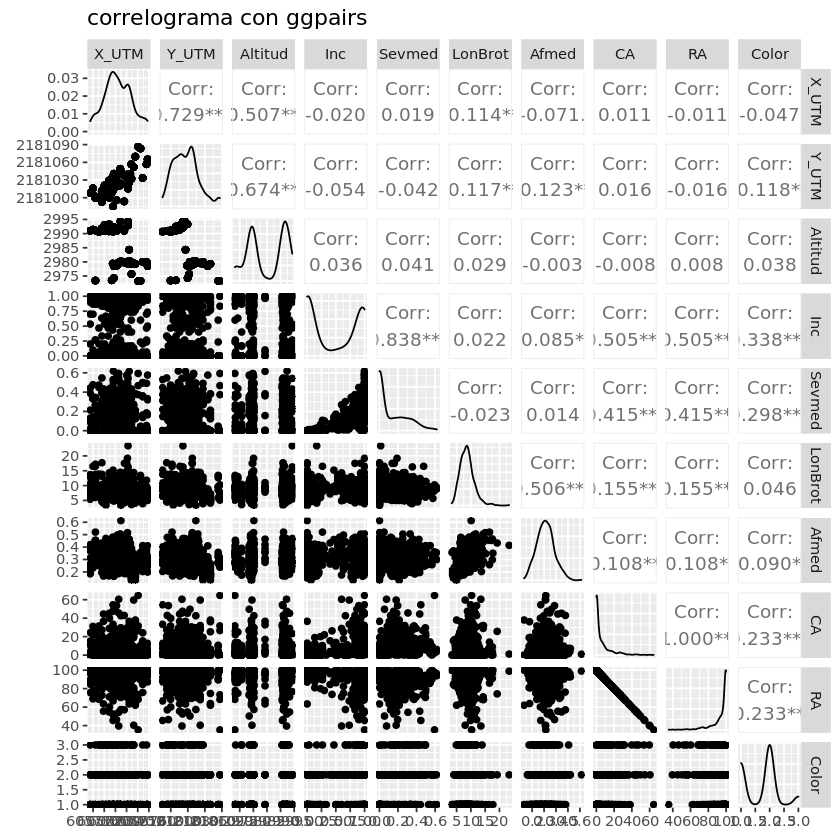

In [16]:
#base de datos
summary(base)
class(base)
str(base)

#matriz de diagramas de dispersion
pairs(base[,c(5,6,7,9,10,12,18,19,22,24,28:30,32)])

library(GGally)
ggpairs(base[,c(5,6,7,18,19,22,24,28:30)], 
        title="correlograma con ggpairs") 

library(psych)
psych::pairs.panels(base[,c(5,6,7,18,19,22,24,28:30)])

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.7451 1.5196 1.2216 1.0107 0.88496 0.70241 0.69614
Proportion of Variance 0.3045 0.2309 0.1492 0.1021 0.07832 0.04934 0.04846
Cumulative Proportion  0.3045 0.5354 0.6847 0.7868 0.86512 0.91446 0.96292
                           PC8     PC9      PC10
Standard deviation     0.46896 0.38840 1.265e-10
Proportion of Variance 0.02199 0.01509 0.000e+00
Cumulative Proportion  0.98491 1.00000 1.000e+00

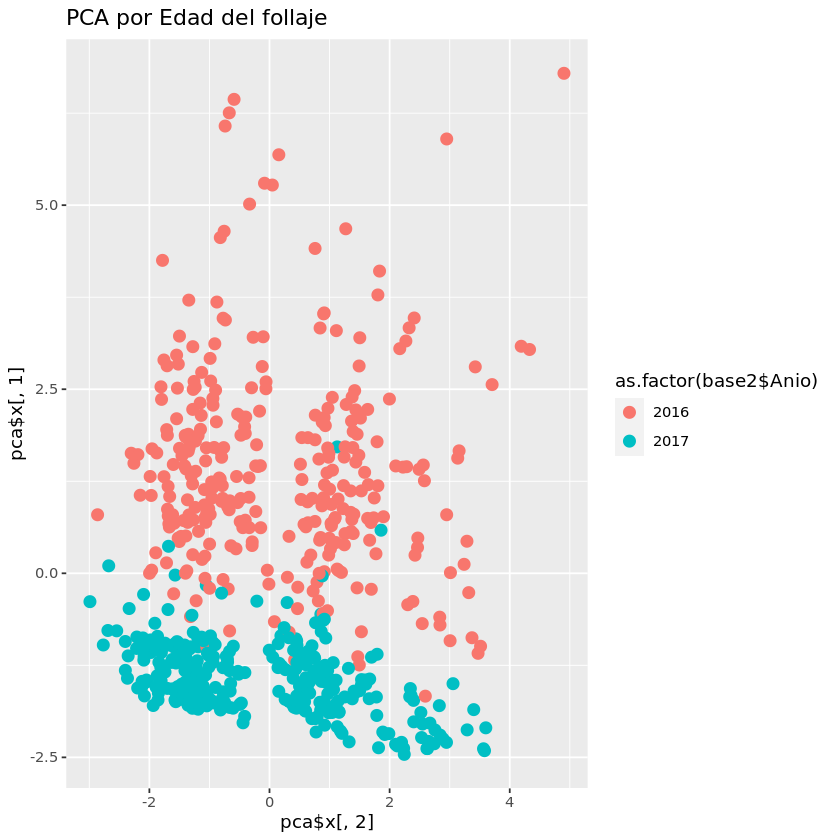

In [12]:
#Análisis de componentes principales 
base2<- na.omit(base[,c(14,2,5,6,7,18,19,22,24,28:30)])
pca <- prcomp(base2[,-c(1,2)], scale = T, center=T)
summary(pca)

#biplot
library(ggplot2)
  ggplot(base2, aes(x = pca$x[,2], y = pca$x[,1], 
  colour = as.factor(base2$Anio)))+
  geom_point(size=3) +
  ggtitle("PCA por Edad del follaje")

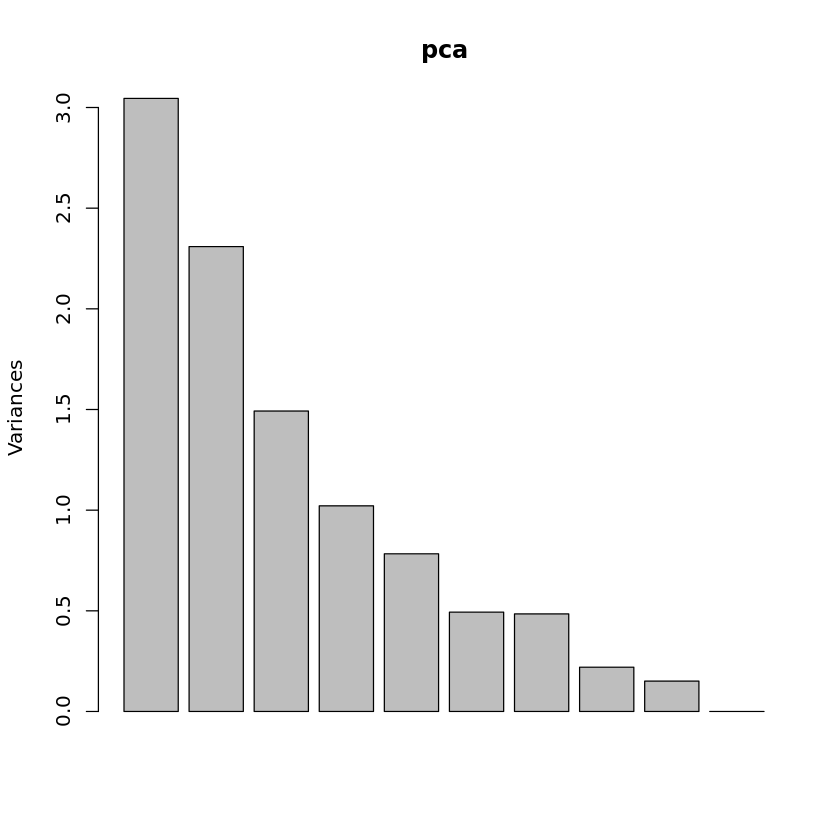

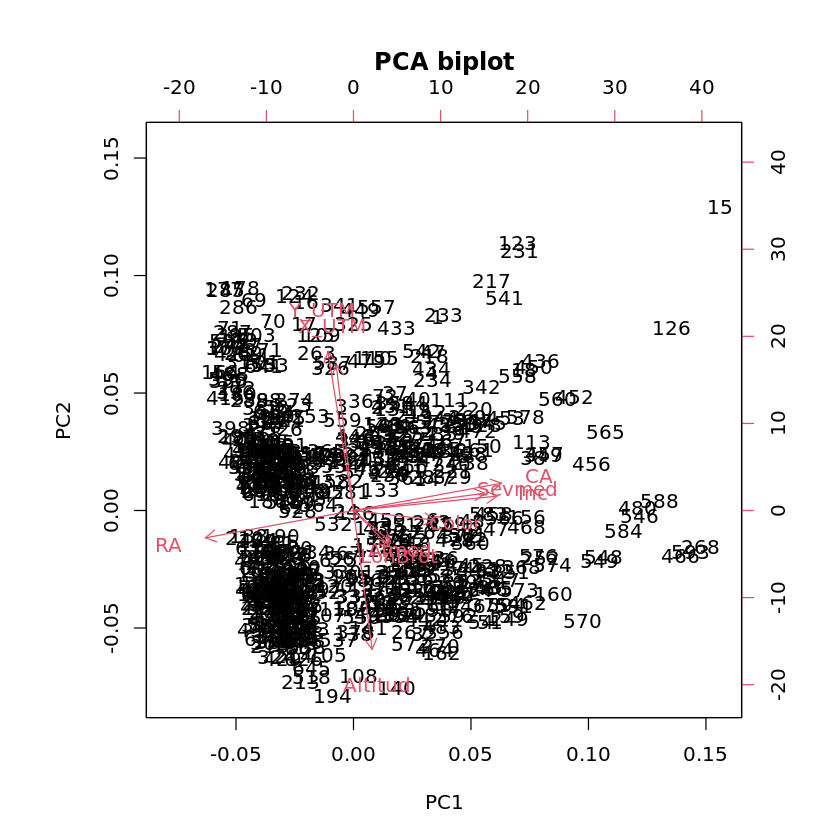

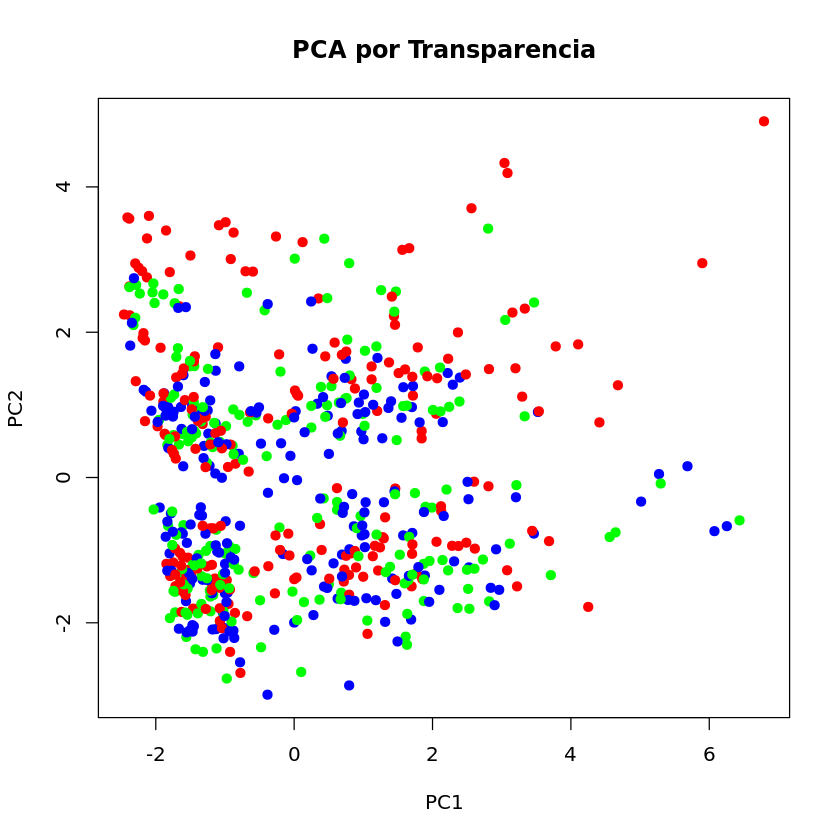

In [15]:
plot(pca)
biplot(pca, main="PCA biplot")

colores <- function(vec){
  # la funci?n rainbow() devuelve un vector que contiene el n?mero de colores distintos
  col <- rainbow(length(unique(vec)))
  return(col[as.numeric(as.factor(vec))])
}

plot(pca$x[,c(1, 2)], col = colores(base$Bloque),
     pch = 19, 
     xlab = "PC1", 
     ylab = "PC2", main="PCA por Transparencia")

**Interpretación:** De acuerdo con el AED y ACP se seleccionaron las variables transparencia de copa, coordenadas UTM (X y Y), altitud, incidencia, severidad, longitud de brote, área de acícula, acículas caidas, acículas retenidas y color de acícula, para implementar las técnicas de ML.


### **2) Random Forest**

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice




 Alta  Baja Media 
  200   216   208 


Call:
 randomForest(formula = Bloque ~ ., data = train, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.28%
Confusion matrix:
      Alta Baja Media class.error
Alta   132    4     1  0.03649635
Baja     0  160     0  0.00000000
Media    4    1   136  0.03546099

Confusion Matrix and Statistics

          Reference
Prediction Alta Baja Media
     Alta   137    0     0
     Baja     0  160     0
     Media    0    0   141

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9916, 1)
    No Information Rate : 0.3653     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Alta Class: Baja Class: Media
Sensitivity               1.0000      1.0000       1.0000
Specificity               1.0000      1.0000       1.0000
Pos Pred Value            1.0000      1.0000       1.0000
Neg Pred Value            1.0000      1.0000       1.0000
Prevalence                0.3128      0.3653       0.3219
Detection Rate            0.3128      0.3653       0.3219
Detection Prevalence      0.3128      0.3653    

       
p1      Alta Baja Media
  Alta   137    0     0
  Baja     0  160     0
  Media    0    0   141

[1] 0

Confusion Matrix and Statistics

          Reference
Prediction Alta Baja Media
     Alta    60    0     0
     Baja     2   56     0
     Media    1    0    67

Overall Statistics
                                          
               Accuracy : 0.9839          
                 95% CI : (0.9536, 0.9967)
    No Information Rate : 0.3602          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9758          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Alta Class: Baja Class: Media
Sensitivity               0.9524      1.0000       1.0000
Specificity               1.0000      0.9846       0.9916
Pos Pred Value            1.0000      0.9655       0.9853
Neg Pred Value            0.9762      1.0000       1.0000
Prevalence                0.3387      0.3011       0.3602
Detection Rate            0.3226      0.3011       0.3602
Det

       
p2      Alta Baja Media
  Alta    60    0     0
  Baja     2   56     0
  Media    1    0    67

[1] 0.01612903

mtry = 3  OOB error = 17.53% 
Searching left ...
mtry = 6 	OOB error = 8.42% 
0.519802 0.05 


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
“invalid mtry: reset to within valid range”


mtry = 12 	OOB error = 3.04% 
0.6390171 0.05 


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
“invalid mtry: reset to within valid range”


mtry = 24 	OOB error = 2.36% 
0.2224409 0.05 


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
“invalid mtry: reset to within valid range”


mtry = 48 	OOB error = 4.83% 
-1.04665 0.05 
Searching right ...
mtry = 1 	OOB error = 47.96% 
-19.30272 0.05 


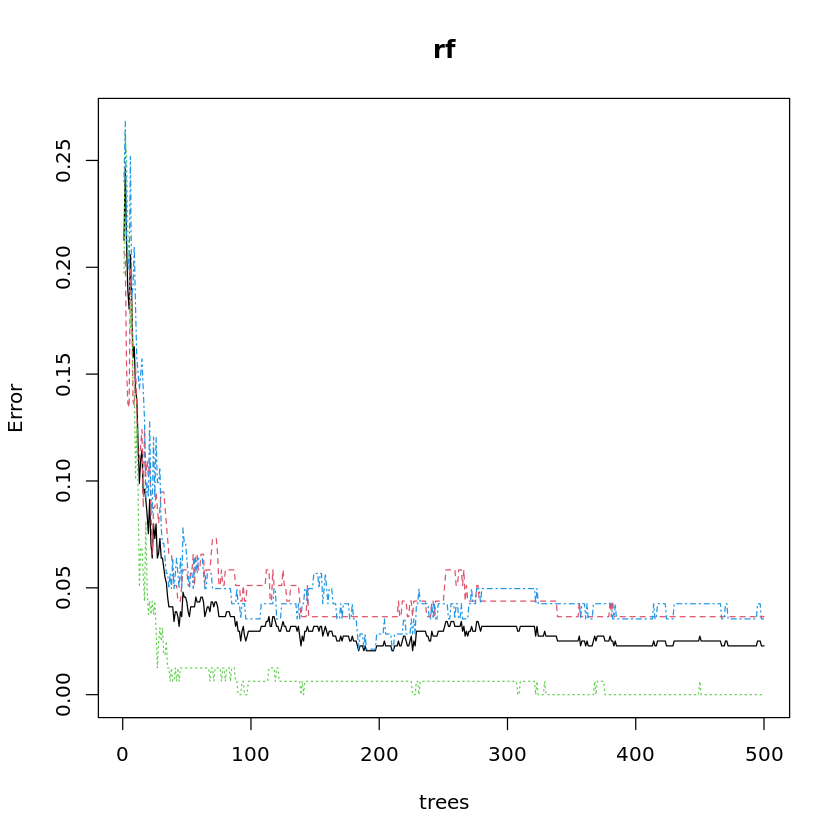

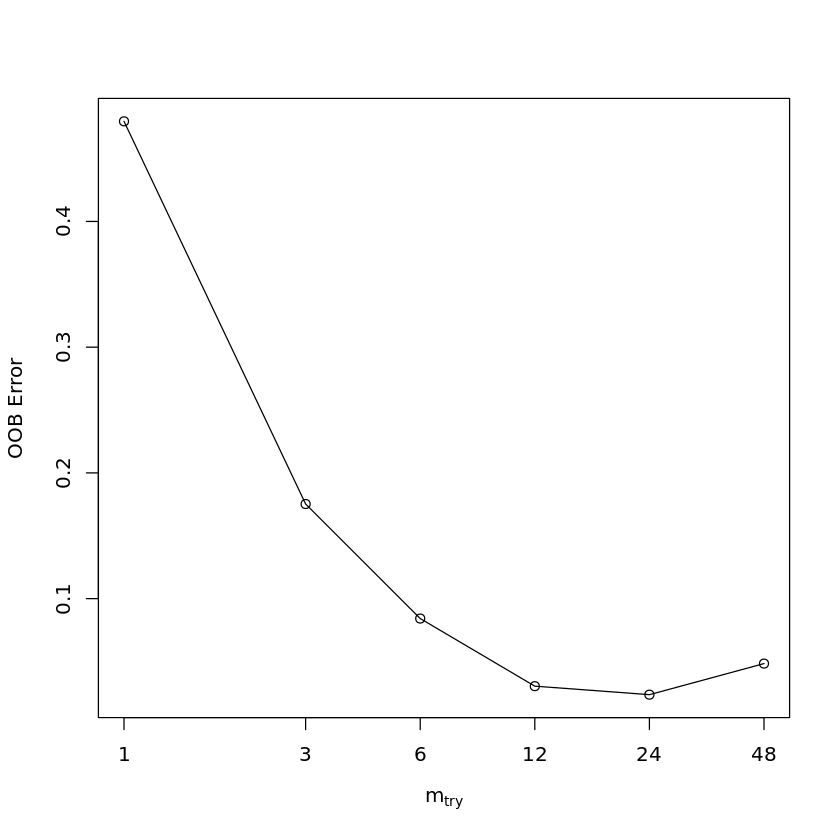

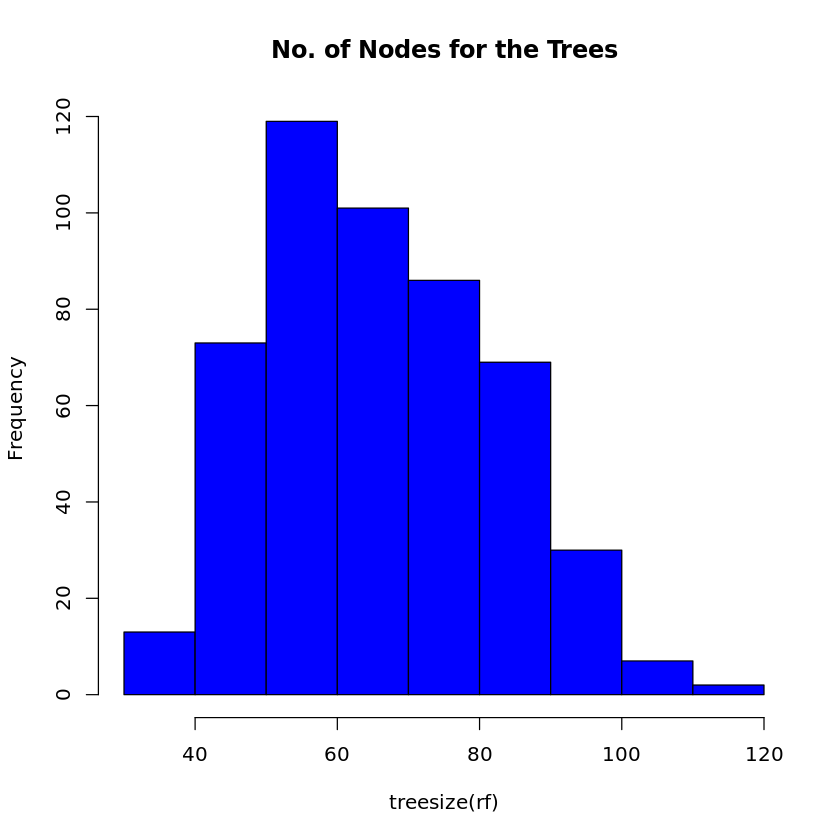

,MeanDecreaseGini
X_UTM,85.378578
Y_UTM,76.219320
Altitud,54.328330
Inc,5.457896
Sevmed,8.613401
LonBrot,20.168919
Afmed,20.634459
CA,8.147649
RA,8.153187
Color,3.360461


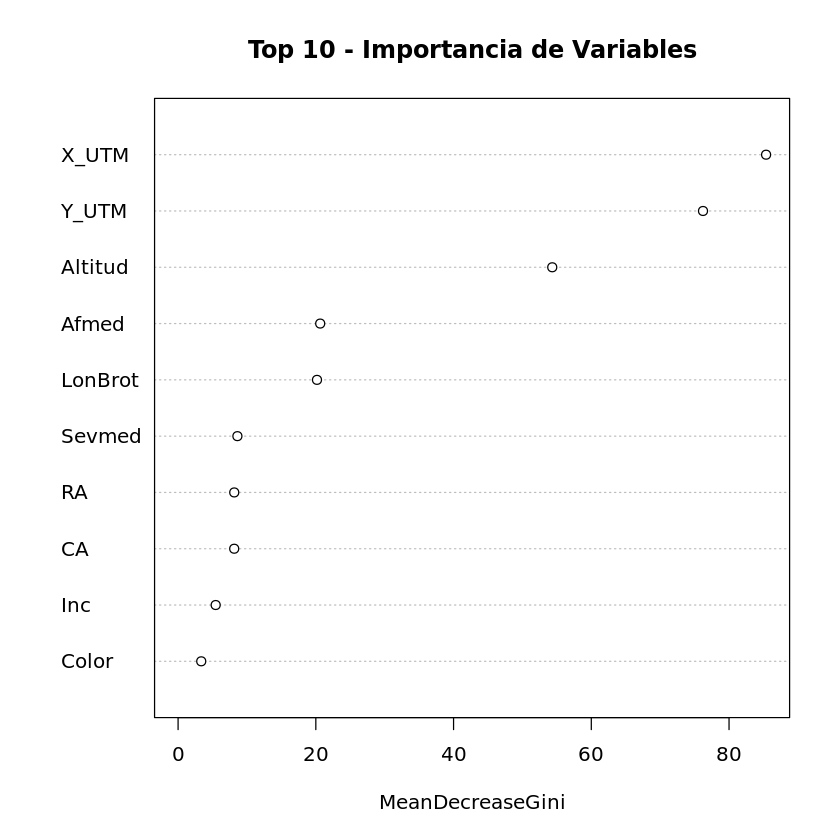

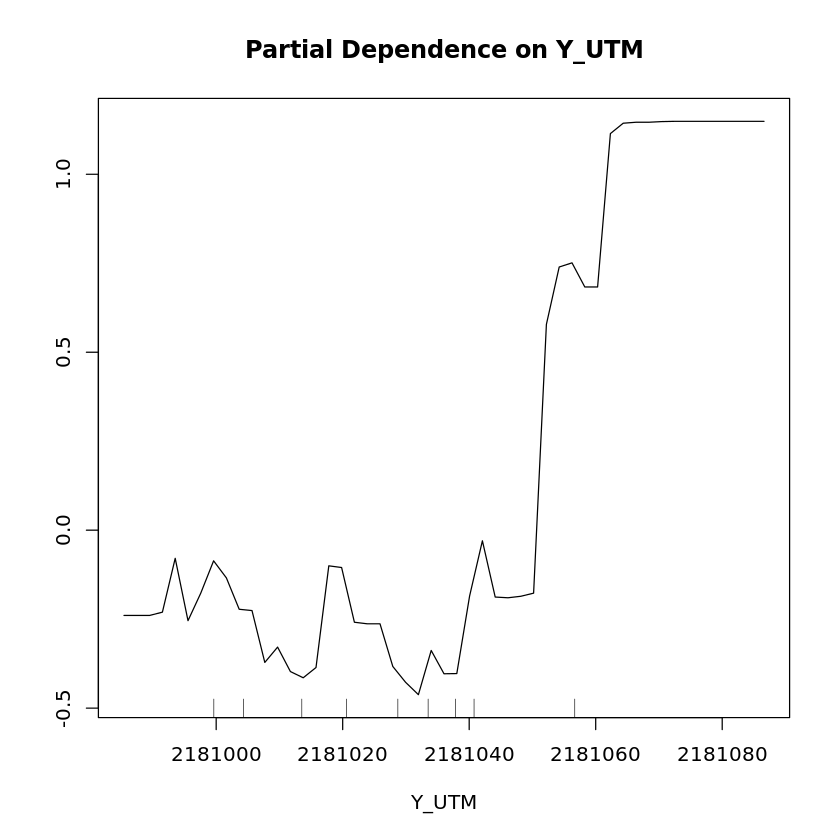

In [17]:
library(randomForest)
library(caret)

#Getting Data
base_rf <- na.omit(base[,c(2,5,6,7,18,19,22,24,28:30)])

base_rf$Bloque <- as.factor(base_rf$Bloque)
table(base_rf$Bloque)

#Data Partition
set.seed(123)
ind <- sample(2, nrow(base_rf), replace = TRUE, prob = c(0.7, 0.3))
train <- base_rf[ind==1,]
test <- base_rf[ind==2,]

#Random Forest in R
rf <- randomForest(Bloque~., data=train, proximity=TRUE) 
rf

#Confusion Matrix and Statistics
p1 <- predict(rf, train)
confusionMatrix(p1, train$Bloque)
(tab1 <- table(p1, train$Bloque))
1 - sum(diag(tab1)) / sum(tab1)
#error del 0%


p2 <- predict(rf, test)
confusionMatrix(p2, test$Bloque)
(tab2 <- table(p2, test$Bloque))
1 - sum(diag(tab2)) / sum(tab2)
#error del 0%



#Error rate of Random Forest
plot(rf)

#Tune mtry (Número de variables aleatorias utilizadas en cada árbol)
t <- tuneRF(train[,-1], train[,1],
            stepFactor = 0.5,
            plot = TRUE,
            ntreeTry = 5,
            trace = TRUE,
            improve = 0.05)
#mtry=6

#No. of nodes for the trees
hist(treesize(rf),
     main = "No. of Nodes for the Trees",
     col = "blue")
#media de 60 árboles

#Variable Importance
varImpPlot(rf,
           sort = T,
           n.var = 10,
           main = "Top 10 - Importancia de Variables")
importance(rf)

#Partial Dependence Plot
partialPlot(rf, train, Y_UTM, "Alta")

**Interpretación:** se obtuvo una precisión del 98% y un valor $\kappa$= 0.98, una
mtry (Número de variables aleatorias utilizadas en cada árbol) de 6, 60 nodos promedio por árbol, las variables de mayor peso son las coordenadas UTM (X y Y).

### **3) Naive Bayes**

naivebayes 0.9.7 loaded


Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





 Alta  Baja Media 
  200   216   208 

Warning message:
“Removed 3 rows containing missing values (geom_segment).”



================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = Bloque ~ ., data = train_nb, usekernel = T)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

     Alta      Baja     Media 
0.3294931 0.3525346 0.3179724 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: X_UTM::Alta (KDE)
--------------------------------------------------------------------------------- 

Call:
	density.default(x = x, na.rm = TRUE)

Data: x (143 obs.);	Bandwidth 'bw' = 4.234

       x                y            
 Min.   :605708   Min.   :6.845e-05  
 1st Qu.:605724   1st Qu.:5.646e-03  
 Median :605740   Median :1.531e-02  
 Mean   :605740   Mean

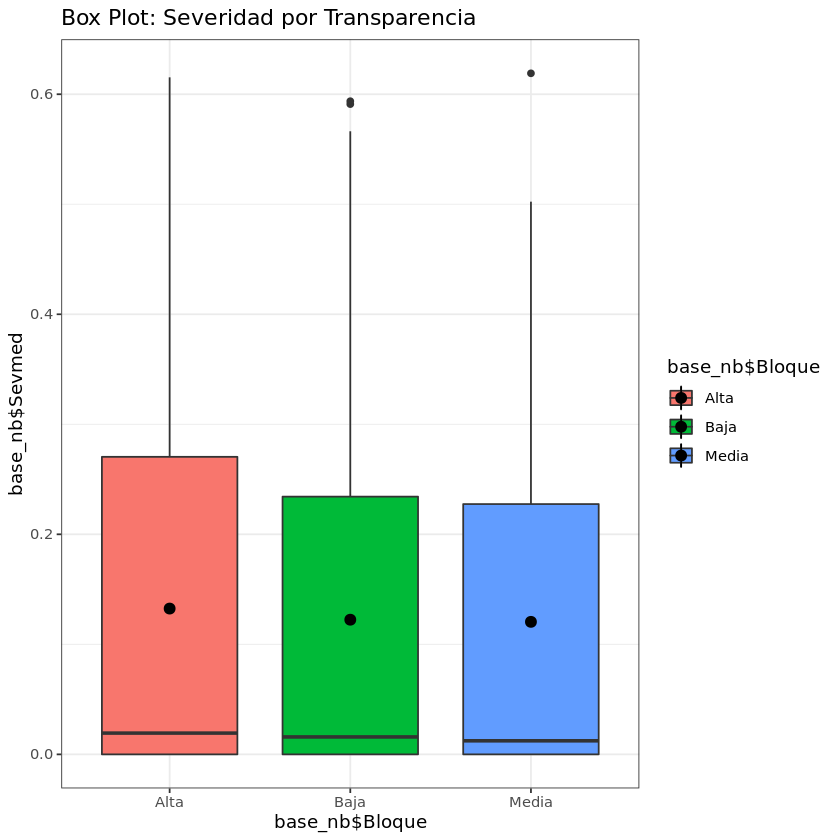

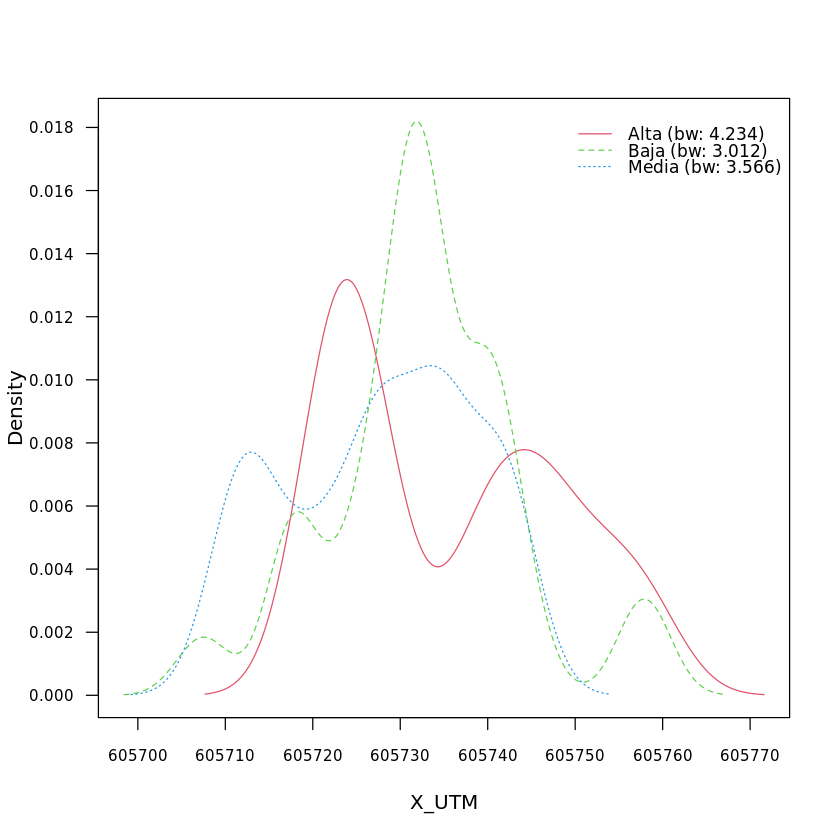

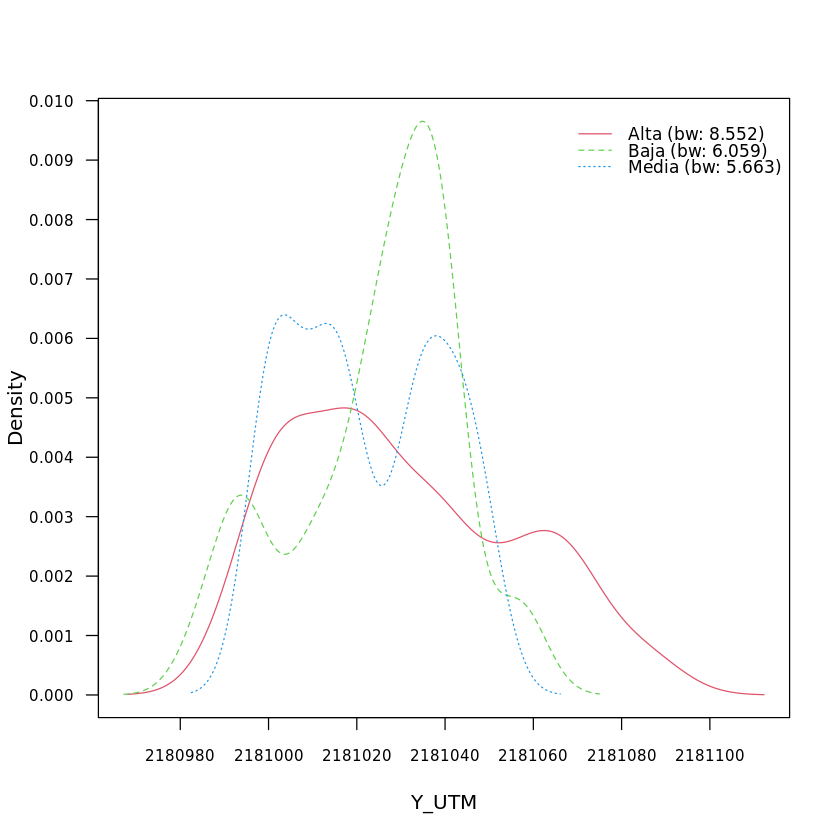

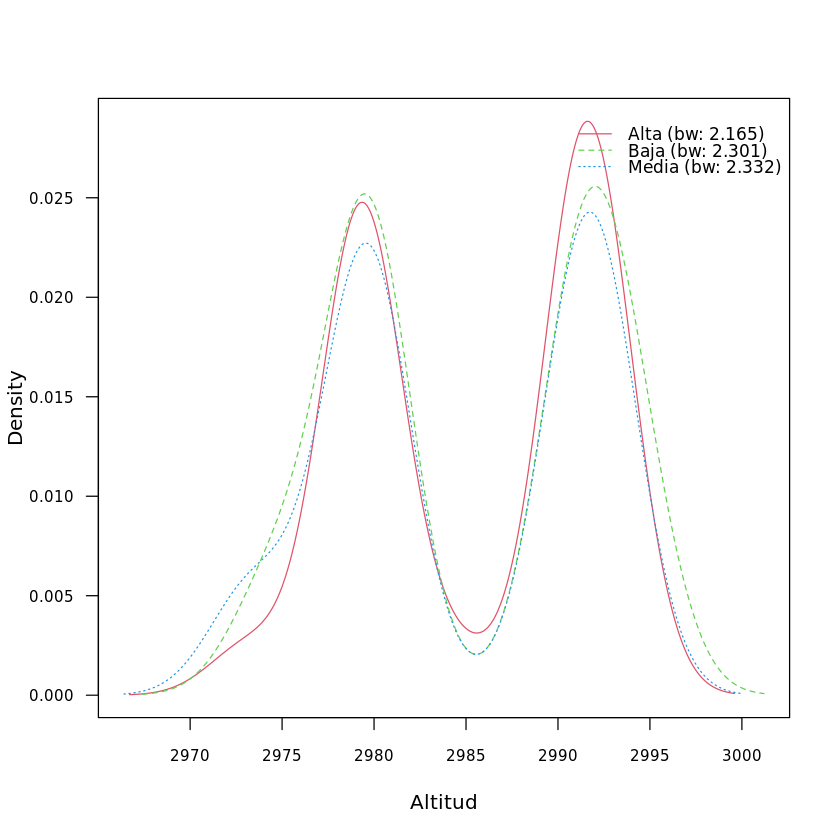

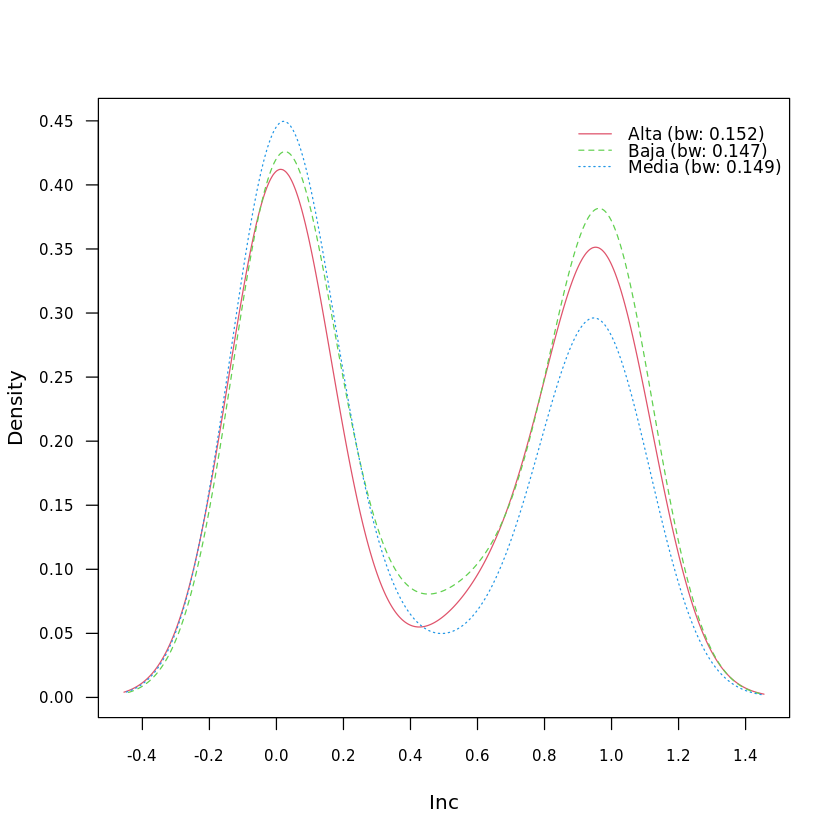

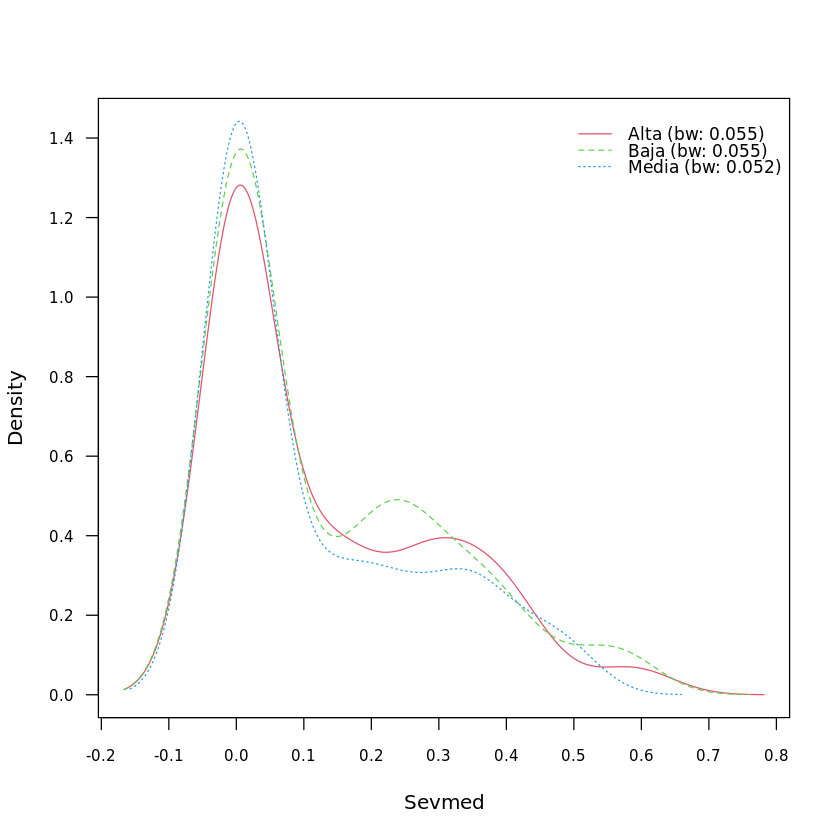

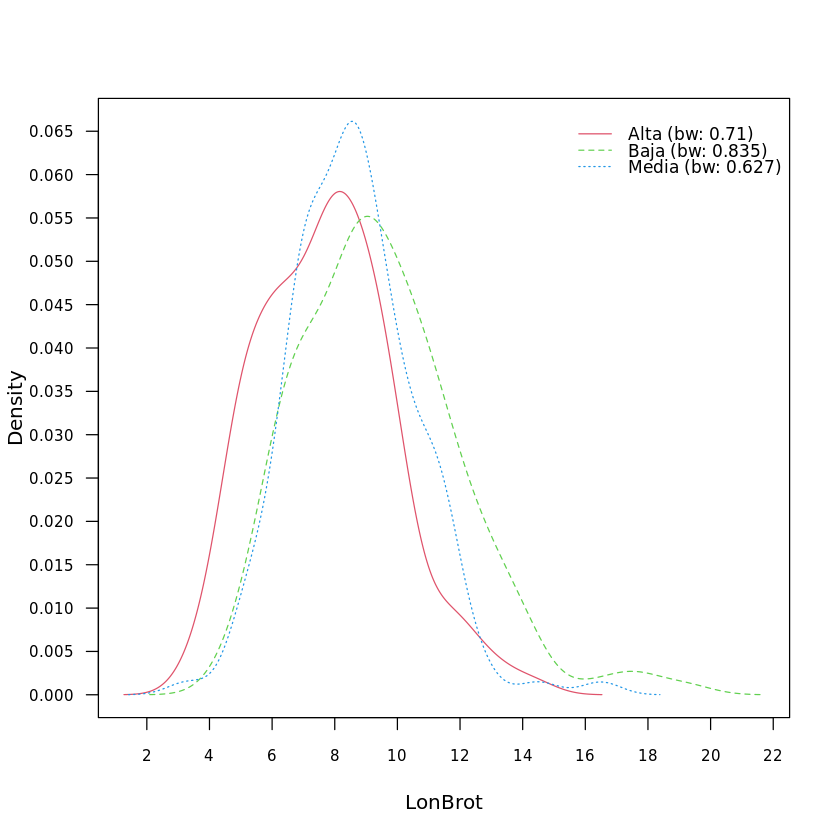

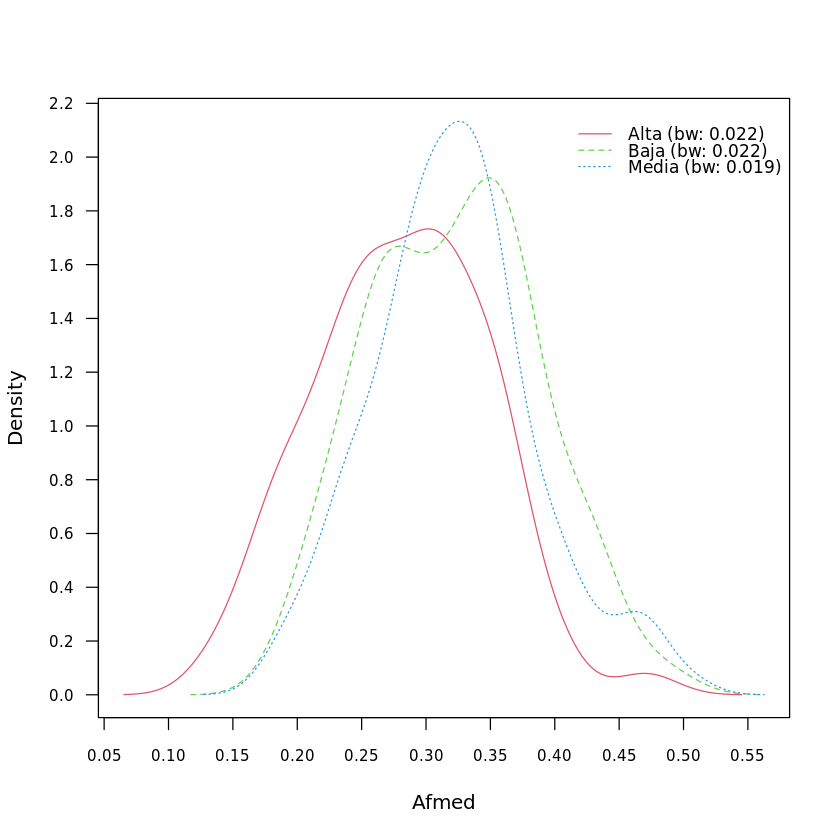

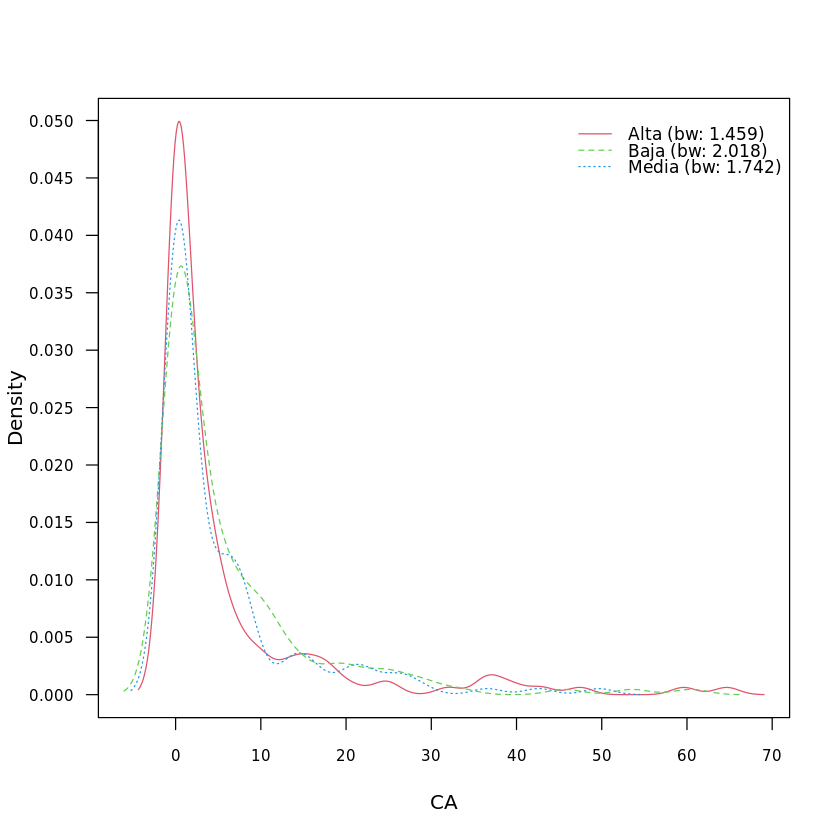

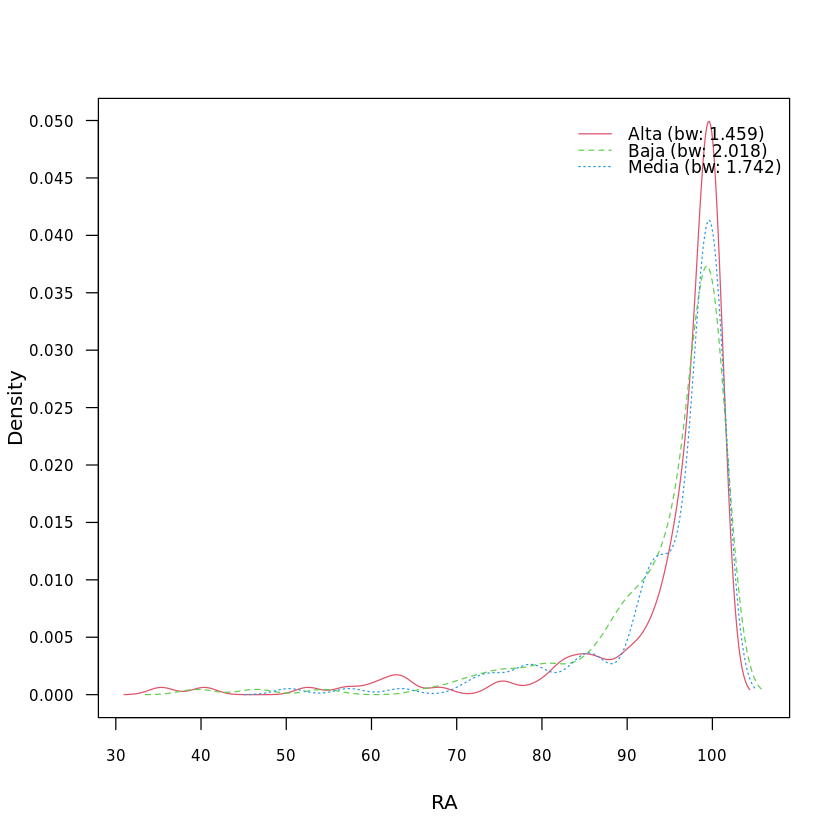

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


,Alta,Baja,Media,Bloque,X_UTM,Y_UTM,Altitud,Inc,Sevmed,LonBrot,Afmed,CA,RA,Color
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.9787447,0.01850964,0.002745704,Alta,605747.9,2181070,2979.3,0.9000000,0.1503333,7.25,0.2393667,25.252525,74.74747,1
2,0.4113505,0.53406359,0.054585864,Alta,605744.3,2181057,2979.3,1.0000000,0.3310000,12.90,0.3744867,1.526718,98.47328,1
3,0.6491587,0.25629479,0.094546554,Alta,605740.2,2181039,2979.5,0.7666667,0.3466667,5.10,0.1960667,2.816901,97.18310,1
4,0.8842636,0.11442525,0.001311104,Alta,605754.5,2181034,2980.0,1.0000000,0.3510000,3.90,0.3699000,15.384615,84.61538,1
6,0.8065772,0.14937314,0.044049685,Alta,605727.7,2181021,2992.3,1.0000000,0.2486667,5.00,0.2253667,17.441860,82.55814,1
7,0.7160262,0.07648249,0.207491317,Alta,605724.3,2181003,2990.8,1.0000000,0.4033333,6.80,0.2549333,4.225352,95.77465,1


Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


       
p1      Alta Baja Media
  Alta    91   19    20
  Baja    19   97    26
  Media   33   37    92

[1] 0.3548387

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


       
p2      Alta Baja Media
  Alta    28   14    13
  Baja    12   30    22
  Media   17   19    35

[1] Baja  Baja  Alta  Baja  Media Media Baja  Media Alta  Alta  Baja  Alta 
 [13] Media Alta  Media Baja  Media Media Media Media Baja  Media Baja  Baja 
 [25] Baja  Baja  Alta  Media Baja  Alta  Alta  Baja  Alta  Alta  Media Baja 
 [37] Baja  Baja  Baja  Baja  Media Alta  Media Alta  Media Alta  Media Media
 [49] Media Media Media Alta  Media Alta  Baja  Baja  Media Alta  Baja  Media
 [61] Alta  Baja  Media Alta  Media Media Baja  Media Media Alta  Alta  Baja 
 [73] Baja  Alta  Media Baja  Media Baja  Alta  Alta  Media Media Media Alta 
 [85] Media Media Baja  Media Alta  Baja  Baja  Media Media Alta  Baja  Baja 
 [97] Baja  Media Media Media Alta  Alta  Baja  Baja  Media Alta  Media Alta 
[109] Baja  Media Alta  Alta  Alta  Media Media Alta  Media Alta  Alta  Baja 
[121] Media Baja  Media Media Alta  Alta  Media Alta  Alta  Media Baja  Baja 
[133] Baja  Baja  Baja  Media Media Baja  Media Baja  Baja  Alta  Media Media
[145] Alta  Alta  Baja  Media Media Media Alta  Alta  Baja  Alta  Baja  Media
[157] Alta  Alta  Media Alta  Alta  Alta  Media Baja  Baja  Baja  Baja  Media
[169] Baja  Media Baja  Baja  Baja  Baja  Baja  Baja  Alta  Baja  Alta  Media
[181] Alta  Alta  Media Media Media Baja  Baja  Media Baja  Media
Levels: Alta Baja Media

[1] 0.5105263

Confusion Matrix and Statistics

          Reference
Prediction Alta Baja Media
     Alta    28   14    13
     Baja    12   30    22
     Media   17   19    35

Overall Statistics
                                          
               Accuracy : 0.4895          
                 95% CI : (0.4164, 0.5629)
    No Information Rate : 0.3684          
    P-Value [Acc > NIR] : 0.0004302       
                                          
                  Kappa : 0.2309          
                                          
 Mcnemar's Test P-Value : 0.8238127       

Statistics by Class:

                     Class: Alta Class: Baja Class: Media
Sensitivity               0.4912      0.4762       0.5000
Specificity               0.7970      0.7323       0.7000
Pos Pred Value            0.5091      0.4688       0.4930
Neg Pred Value            0.7852      0.7381       0.7059
Prevalence                0.3000      0.3316       0.3684
Detection Rate            0.1474      0.1579       0.1842
Det

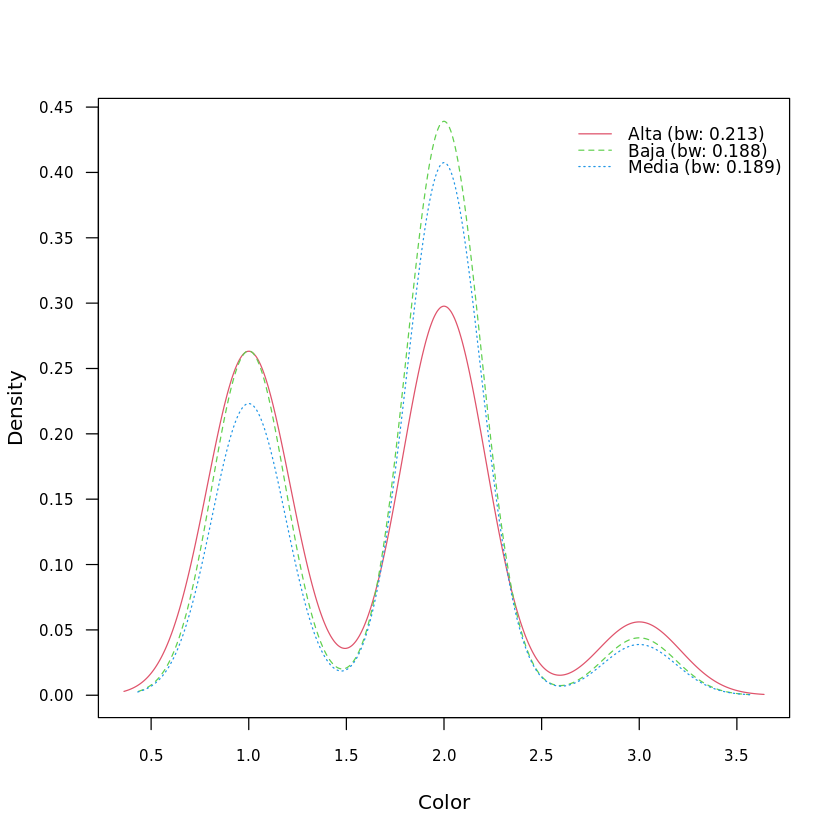

In [18]:
#clasificacion en datos poco correlacionados
#https://www.r-bloggers.com/2021/04/naive-bayes-classification-in-r/
#Para segmentar imagenes (severidad)
#https://plantcv.readthedocs.io/en/latest/tutorials/machine_learning_tutorial/
library(naivebayes)
library(dplyr)
library(ggplot2)


base_nb <- na.omit(base[,c(2,5,6,7,18,19,22,24,28:30)])

#Dplyr
base_nb$Bloque <- as.factor(base_nb$Bloque)
table(base_nb$Bloque)

base_nb %>%
  ggplot(aes(x=base_nb$Bloque
             , y=base_nb$Sevmed, fill = base_nb$Bloque)) +
  geom_boxplot() +theme_bw()+stat_summary(fun="mean")+
  ggtitle("Box Plot: Severidad por Transparencia")


#particion de datos
set.seed(1234)
ind <- sample(2, nrow(base_nb), replace = T, prob = c(0.7, 0.3))
train_nb <- base_nb[ind == 1,]
test_nb <- base_nb[ind == 2,]



nb <- naive_bayes(Bloque ~ ., data = train_nb, usekernel = T) 
nb 

plot(nb) 

#Prediccion
p <- predict(nb, train_nb, type = 'prob')
head(cbind(p, train_nb))

#Confusion Matrix – train data
p1 <- predict(nb, train_nb)
(tab1 <- table(p1, train_nb$Bloque))

1 - sum(diag(tab1)) / sum(tab1) #error del 35%

#Confusion Matrix – test data
p2 <- predict(nb, test_nb)
(tab2 <- table(p2, test_nb$Bloque))
p2

1 - sum(diag(tab2)) / sum(tab2) #error del 51%

library(caret)
confusionMatrix(p2,test_nb$Bloque)




**Interpretación:** se obtuvo una precisión de 49% y un valor de $\kappa$=0.23.
En general esta técnica no fue tan buena para clasificar la transparencia de copa.


### **4) K-NN**

In [20]:
#https://rpubs.com/JairoAyala/601703

library(kknn)

base_knn <- na.omit(base[,c(2,5,6,7,9,10,12,18,19,22,24,28:30,32)])

base_knn$Bloque <- as.factor(base_knn$Bloque)
table(base_knn$Bloque)


set.seed(2020)
muestra <- sample(1:624, 437)
train_knn <- base_knn[muestra,]#70%
test_knn<- base_knn[-muestra,]#30%
dim(train_knn)[1]
dim(test_knn)[1]

knn <- train.kknn(Bloque~ ., data = train_knn, kmax = 9)
knn

entre <- predict(knn, train_knn[,-1])
tt  <- table(train_knn[,1],entre)
tt

precision <- (sum(diag(tt)))/sum(tt)
precision

#precisión del 100 % en datos de entrenamiento


#Precisión test de prueba
pred    <- predict(knn, test_knn[,-1])
table   <- table(test_knn[,1],pred)
table


clas    <- (sum(diag(table)))/sum(table)
clas

#Precisión del 53% de datos de prueba

#matriz de confusion con la prueba

library(caret)
confusionMatrix(pred,test_knn$Bloque)

ERROR: Error: package or namespace load failed for ‘kknn’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/srv/rlibs/igraph/libs/igraph.so':
  libglpk.so.40: cannot open shared object file: No such file or directory


**Interpretación:** se obtuvo una precisión de 53% y un valor de $\kappa$=0.30.
En general esta técnica no fue tan buena para clasificar la transparencia de copa.

### **5) Curvas Receiver Operating Characteristic (ROC)**

[[1]]
[1] 0.9993548

[[1]]
[1] 1

[[1]]
[1] 1



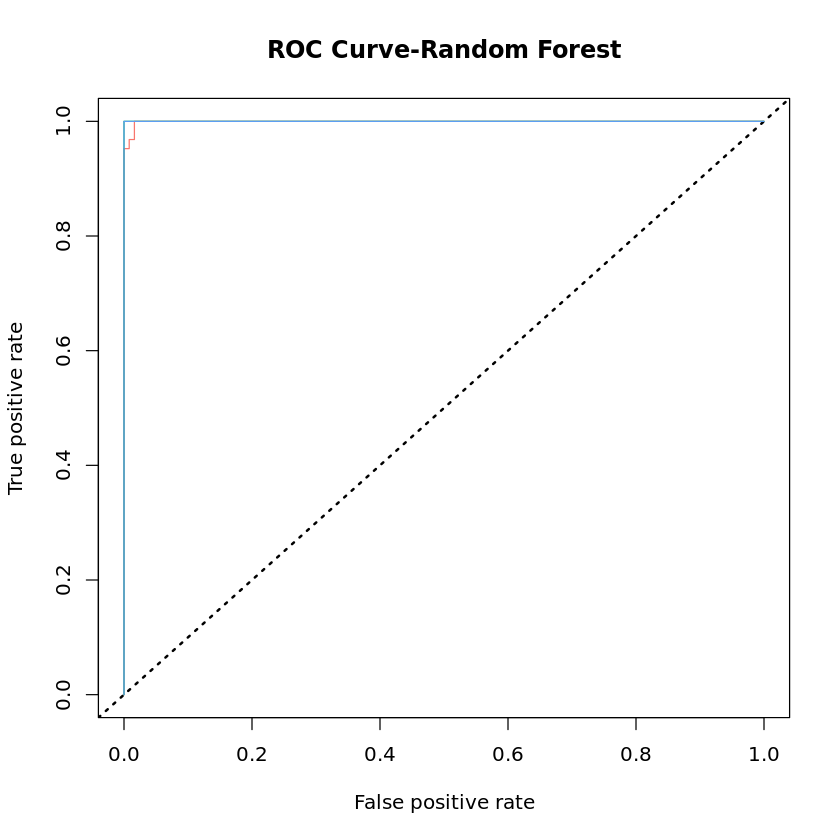

[[1]]
[1] 0.7632238

[[1]]
[1] 0.6860392

[[1]]
[1] 0.702381



ERROR: Error in predict(knn, test_knn[, -1], type = "prob"): object 'knn' not found


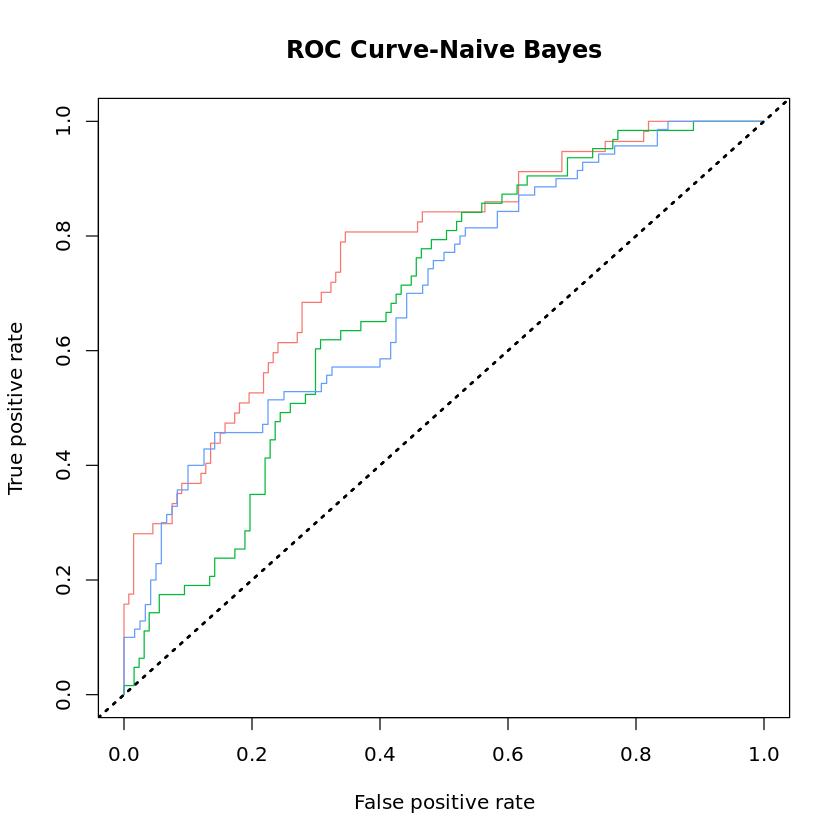

In [21]:
# Validation set assessment #2: ROC curves and AUC
# Needs to import ROCR package for ROC curve plotting:
library(ROCR)
# Calculate the probability of new observations belonging to each class
# prediction_for_roc_curve will be a matrix with dimensions data_set_size x number_of_classes
prediction_for_roc_curve <- predict(rf,test[,-1],type="prob")
# Use pretty colours:
pretty_colours <- c("#F8766D","#00BA38","#619CFF")
# Specify the different classes 
test$Bloque <- as.factor(test$Bloque)
classes <- levels(test$Bloque)
# For each class
for (i in 1:3)
{
  # Define which observations belong to class[i]
  true_values <- ifelse(test[,1]==classes[i],1,0)
  # Assess the performance of classifier for class[i]
  pred <- prediction(prediction_for_roc_curve[,i],true_values)
  perf <- performance(pred, "tpr", "fpr")
  if (i==1)
  {
    plot(perf,main="ROC Curve-Random Forest",col=pretty_colours[i])
    abline (a = 0, b = 1, lty="dotted", lwd=2) 
  }
  else
  {
    plot(perf,main="ROC Curve- Random Forest",col=pretty_colours[i],add=TRUE) 
  }
  # Calculate the AUC and print it to screen
  auc.perf <- performance(pred, measure = "auc")
  print(auc.perf@y.values)
}


#Naive Bayes (ROC)

# Validation set assessment #2: ROC curves and AUC
# Needs to import ROCR package for ROC curve plotting:
library(ROCR)
# Calculate the probability of new observations belonging to each class
# prediction_for_roc_curve will be a matrix with dimensions data_set_size x number_of_classes
prediction_for_roc_curve <- predict(nb,test_nb[,-1],type="prob")
# Use pretty colours:
pretty_colours <- c("#F8766D","#00BA38","#619CFF")
# Specify the different classes 
test_nb$Bloque <- as.factor(test_nb$Bloque)
classes <- levels(test_nb$Bloque)
# For each class
for (i in 1:3)
{
  # Define which observations belong to class[i]
  true_values <- ifelse(test_nb[,1]==classes[i],1,0)
  # Assess the performance of classifier for class[i]
  pred <- prediction(prediction_for_roc_curve[,i],true_values)
  perf <- performance(pred, "tpr", "fpr")
  if (i==1)
  {
    plot(perf,main="ROC Curve-Naive Bayes",col=pretty_colours[i]) 
  }
  else
  {
    plot(perf,main="ROC Curve-Naive Bayes",col=pretty_colours[i],add=TRUE)
    abline (a = 0, b = 1, lty="dotted", lwd=2) 
  }
  # Calculate the AUC and print it to screen
  auc.perf <- performance(pred, measure = "auc")
  print(auc.perf@y.values)
}



#KNN (ROC)

# Validation set assessment #2: ROC curves and AUC
# Needs to import ROCR package for ROC curve plotting:
library(ROCR)
# Calculate the probability of new observations belonging to each class
# prediction_for_roc_curve will be a matrix with dimensions data_set_size x number_of_classes
prediction_for_roc_curve <- predict(knn,test_knn[,-1],type="prob")
# Use pretty colours:
pretty_colours <- c("#F8766D","#00BA38","#619CFF")
# Specify the different classes 
test_knn$Bloque <- as.factor(test_knn$Bloque)
classes <- levels(test_knn$Bloque)
# For each class
for (i in 1:3)
{
  # Define which observations belong to class[i]
  true_values <- ifelse(test_knn[,1]==classes[i],1,0)
  # Assess the performance of classifier for class[i]
  pred <- prediction(prediction_for_roc_curve[,i],true_values)
  perf <- performance(pred, "tpr", "fpr")
  if (i==1)
  {
    plot(perf,main="ROC Curve - KNN",col=pretty_colours[i]) 
  }
  else
  {
    plot(perf,main="ROC Curve -KNN",col=pretty_colours[i],add=TRUE)
    abline (a = 0, b = 1, lty="dotted", lwd=2) 
  }
  # Calculate the AUC and print it to screen
  auc.perf <- performance(pred, measure = "auc")
  print(auc.perf@y.values)
}


#cuadro con valores de precision
p <-rbind(c(0.98,0.49,0.53)) 
k <- rbind(c(0.98,0.23,0.30))
r <- rbind(c(1.00, 0.70, 0.72))
pres <- rbind(p,k,r)
pres <- as.data.frame(pres)
colnames(pres) <- c("Random Forest","Naive Bayes", "K-NN")
pres <- cbind(Métrica=c("Precisión(%)","Kappa", "AUC-ROC"),pres)

library(gt)
pres %>% gt()


**Interpretación:** De acuerdo la evaluación de las curvas ROC, es evidente qu el mejor modelo para clasificar a la transparencia de copa de Douglas-fir fue el Random Forest, ya que tuvo mayor cantidad de positivos verdaderos en comparación de Naive Bayes y K-NN, donde se pueden considera que son modelos de regulares a malos.
